In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
class IdentityBlock(tf.keras.Model):
    def __init__(self,filters,kernel_size):
        super(IdentityBlock, self).__init__(name='')
        self.conv1 = tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        
        self.conv2 = tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        
        self.act=tf.keras.layers.Activation('relu')
        self.add=tf.keras.layers.Add()
    def call(self,inputs):
        x=self.conv1(inputs)
        x=self.bn1(x)
        
        x=self.act(x)
        
        x=self.conv2(x)
        x=self.bn2(x)
        
        x=self.add([x,inputs])
        
        output=self.act(x)
        
        return output
        
        

<img src="img.png" alt="Drawing" style="width: 500px;"/>

In [26]:
class ResNet(tf.keras.Model):
    def __init__(self,n_class):
        super(ResNet, self).__init__() #with out this line RuntimeError: It looks like you are subclassing `Model` and
        #you forgot to call `super(YourClass, self).__init__()`. Always start with this line.
        self.conv=tf.keras.layers.Conv2D(64,7,padding='same')
        self.bn1=tf.keras.layers.BatchNormalization()
        self.maxpool=tf.keras.layers.MaxPool2D((3,3))
        self.act=tf.keras.layers.Activation('relu')
        
        self.id1=IdentityBlock(64,3)
        self.id2=IdentityBlock(64,3)
        
        self.globalpool=tf.keras.layers.GlobalAveragePooling2D()
        #self.classifier=tf.keras.layers.Dense(n_class,activation='softmax')
        self.classifier = tf.keras.layers.Dense(n_class, activation='softmax')
    def call(self,input):
            x=self.conv(input)
            x=self.bn1(x)
            x=self.act(x)
            
            x=self.maxpool(x)
            
            x=self.id1(x)
           # x=self.id2(x)
            
            x=self.globalpool(x)
            output=self.classifier(x)
            return output

In [27]:
mnist=tf.keras.datasets.mnist

In [28]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [34]:
train_images.shape


TensorShape([60000, 28, 28, 1])

In [30]:
train_images=tf.reshape(train_images,(60000,28,28,1))
train_images=tf.cast(train_images,'float32')/255.0
test_images=tf.reshape(test_images,(10000,28,28,1))
test_images=tf.cast(test_images,'float32')/255.0
train_images[0]

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],

In [31]:
resnet = ResNet(10)



In [32]:

resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [33]:
resnet.fit(train_images,train_labels,batch_size=64,validation_data=(test_images,test_labels),epochs=1,shuffle=True)

938/938 [==============================] - 89s 94ms/step - loss: 0.2232 - accuracy: 0.9514 - val_loss: 0.2170 - val_accuracy: 0.9307


In [66]:
p=resnet.predict(test_images)

The digit in the image is :7


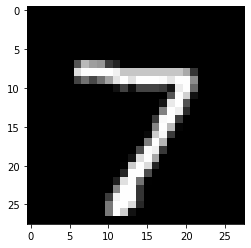

In [70]:
plt.imshow(test_images[0],cmap='gray')
print("The digit in the image is :"+str(np.argmax(p[0])))

In [11]:
resnet.summary()

Model: "res_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  3200      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
identity_block (IdentityBloc multiple                  74368     
_________________________________________________________________
identity_block_1 (IdentityBl multiple                  74368     
_________________________________________________________________
global_average_pooling2d (Gl multiple                  0   